In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime  # for current year

In [73]:
# Load the dataset from Excel
tallest_people = pd.read_excel('tallest_people.xlsx', sheet_name='Sheet1')

# Display the first few rows to check the data
print("Tallest People Dataset:")
print(tallest_people.head())

Tallest People Dataset:
         Country  Metric      Imperial               Name  \
0  United States  272 cm  8 ft 11.1 in      Robert Wadlow   
1  United States  267 cm     8 ft 9 in         John Rogan   
2  United States  264 cm     8 ft 8 in    John F. Carroll   
3  United States  262 cm     8 ft 7 in      Willie Camper   
4        Austria  258 cm   8 ft 5.6 in  Franz Winkelmeier   

                                                Note       Lifespan Gender  
0         Tallest verified human in recorded history  1918-1940(22)   Male  
1  Second-tallest male in recorded history and ta...  1867-1905(38)   Male  
2  8 ft 0 in (244 cm) standing height, 8 ft 8 in ...  1932-1969(37)   Male  
3                  Billed at 8 ft 7 in (262 cm).[12]  1924-1943(18)   Male  
4  Tallest human in European history. Measured of...  1860-1887(27)   Male  


In [74]:
# Drop rows with missing values (if necessary)
tallest_people = tallest_people.dropna()

In [75]:
# Ensure data types are correct
print("\nData Types in Tallest People Dataset:")
print(tallest_people.dtypes)


Data Types in Tallest People Dataset:
Country     object
Metric      object
Imperial    object
Name        object
Note        object
Lifespan    object
Gender      object
dtype: object


In [76]:
# Function to convert imperial value
def convert_imperial(imperial_str):
    try:
        parts = imperial_str.split()
        feet = float(parts[0])  # Extracting feet part
        if len(parts) > 2:  # Check if there's an inches part
            inches = float(parts[2])
        else:
            inches = 0
        return feet + inches / 12  # Converting inches to feet
    except:
        return None  # Handle any potential errors gracefully

# Applying conversion functions to DataFrame columns
tallest_people['Imperial'] = tallest_people['Imperial'].apply(convert_imperial)

In [77]:
print(tallest_people.head())
print(tallest_people.tail())

         Country  Metric  Imperial               Name  \
0  United States  272 cm  8.925000      Robert Wadlow   
1  United States  267 cm  8.750000         John Rogan   
2  United States  264 cm  8.666667    John F. Carroll   
3  United States  262 cm  8.583333      Willie Camper   
4        Austria  258 cm  8.466667  Franz Winkelmeier   

                                                Note       Lifespan Gender  
0         Tallest verified human in recorded history  1918-1940(22)   Male  
1  Second-tallest male in recorded history and ta...  1867-1905(38)   Male  
2  8 ft 0 in (244 cm) standing height, 8 ft 8 in ...  1932-1969(37)   Male  
3                  Billed at 8 ft 7 in (262 cm).[12]  1924-1943(18)   Male  
4  Tallest human in European history. Measured of...  1860-1887(27)   Male  
           Country  Metric  Imperial                 Name  \
180       Thailand  214 cm  7.020833       Malee Duangdee   
181         Latvia  213 cm  7.000000     Uljana Semjonova   
182         

In [78]:
tallest_people.shape

(185, 7)

In [79]:
# Function to extract birth year, death year, and age
def extract_years_and_age(lifespan):
    current_year = datetime.datetime.now().year
    
    try:
        # Check if it's 'born' case
        if lifespan.startswith('born'):
            birth_year = int(lifespan.split('born')[-1])
            death_year = None
            age = current_year - birth_year
            
        elif lifespan.startswith('?'):
            birth_year = None 
            death_year = int(float(lifespan.split('-')[1]))
            age = None

        elif lifespan.endswith('?'):
            birth_year = int(float(lifespan.split('-')[0]))
            death_year = None
            age = None

        elif lifespan.endswith(')'):
            birth_year = int(float(lifespan.split('-')[0]))
            death_and_age = lifespan.split('-')[1]
            death_year = int(float(death_and_age.split('(')[0]))
            age = death_year - birth_year
        
        else:
            # Split the lifespan string by non-digit characters
            birth_year = int(float(lifespan.split('-')[0]))
            death_year = int(float(lifespan.split('-')[1]))
            age = death_year - birth_year
        
        return birth_year, death_year, age
    except Exception as e:
        print(f"Error processing lifespan '{lifespan}': {e}")
        return None, None, None  # Handle any parsing errors gracefully

# Apply function to extract years and age, and create new columns
tallest_people[['BirthYear', 'DeathYear', 'Age']] = tallest_people['Lifespan'].apply(lambda x: pd.Series(extract_years_and_age(x)))

# Display the updated DataFrame
print(tallest_people)

           Country  Metric  Imperial                 Name  \
0    United States  272 cm  8.925000        Robert Wadlow   
1    United States  267 cm  8.750000           John Rogan   
2    United States  264 cm  8.666667      John F. Carroll   
3    United States  262 cm  8.583333        Willie Camper   
4          Austria  258 cm  8.466667    Franz Winkelmeier   
..             ...     ...       ...                  ...   
180       Thailand  214 cm  7.020833       Malee Duangdee   
181         Latvia  213 cm  7.000000     Uljana Semjonova   
182         Sweden  210 cm  6.833333  Kristina Larsdotter   
183      Sri Lanka  208 cm  6.833333  Tharjini Sivalingam   
184  United States  208 cm  6.833333          Maci Currin   

                                                  Note       Lifespan  Gender  \
0           Tallest verified human in recorded history  1918-1940(22)    Male   
1    Second-tallest male in recorded history and ta...  1867-1905(38)    Male   
2    8 ft 0 in (244 cm) 

In [80]:
tallest_people.dtypes

Country       object
Metric        object
Imperial     float64
Name          object
Note          object
Lifespan      object
Gender        object
BirthYear    float64
DeathYear    float64
Age          float64
dtype: object

In [81]:
# Replace NaN values in BirthYear with DeathYear and vice versa, only if Lifespan does not start with "born"
tallest_people['BirthYear'] = tallest_people.apply(
    lambda row: row['DeathYear'] if pd.isna(row['BirthYear']) and not str(row['Lifespan']).startswith('born') else row['BirthYear'],
    axis=1
)
tallest_people['DeathYear'] = tallest_people.apply(
    lambda row: row['BirthYear'] if pd.isna(row['DeathYear']) and not str(row['Lifespan']).startswith('born') else row['DeathYear'],
    axis=1
)


In [82]:
# Replace NaN values in BirthYear with DeathYear and vice versa
#tallest_people['BirthYear'] = tallest_people.apply(
 #   lambda row: row['DeathYear'] if pd.isna(row['BirthYear']) else row['BirthYear'],
  #  axis=1
#)
#tallest_people['DeathYear'] = tallest_people.apply(
 #   lambda row: row['BirthYear'] if pd.isna(row['DeathYear']) else row['DeathYear'],
  #  axis=1
#)

In [83]:
# Check if DeathYear is null and Age is populated
mask = tallest_people['DeathYear'].isnull() & tallest_people['Age'].notnull()

# Set DeathYear to 2030 where the mask is True
tallest_people.loc[mask, 'DeathYear'] = 2025

# Print or inspect the updated DataFrame
print(tallest_people)

           Country  Metric  Imperial                 Name  \
0    United States  272 cm  8.925000        Robert Wadlow   
1    United States  267 cm  8.750000           John Rogan   
2    United States  264 cm  8.666667      John F. Carroll   
3    United States  262 cm  8.583333        Willie Camper   
4          Austria  258 cm  8.466667    Franz Winkelmeier   
..             ...     ...       ...                  ...   
180       Thailand  214 cm  7.020833       Malee Duangdee   
181         Latvia  213 cm  7.000000     Uljana Semjonova   
182         Sweden  210 cm  6.833333  Kristina Larsdotter   
183      Sri Lanka  208 cm  6.833333  Tharjini Sivalingam   
184  United States  208 cm  6.833333          Maci Currin   

                                                  Note       Lifespan  Gender  \
0           Tallest verified human in recorded history  1918-1940(22)    Male   
1    Second-tallest male in recorded history and ta...  1867-1905(38)    Male   
2    8 ft 0 in (244 cm) 

In [84]:
# Display the updated DataFrame
print(tallest_people)

           Country  Metric  Imperial                 Name  \
0    United States  272 cm  8.925000        Robert Wadlow   
1    United States  267 cm  8.750000           John Rogan   
2    United States  264 cm  8.666667      John F. Carroll   
3    United States  262 cm  8.583333        Willie Camper   
4          Austria  258 cm  8.466667    Franz Winkelmeier   
..             ...     ...       ...                  ...   
180       Thailand  214 cm  7.020833       Malee Duangdee   
181         Latvia  213 cm  7.000000     Uljana Semjonova   
182         Sweden  210 cm  6.833333  Kristina Larsdotter   
183      Sri Lanka  208 cm  6.833333  Tharjini Sivalingam   
184  United States  208 cm  6.833333          Maci Currin   

                                                  Note       Lifespan  Gender  \
0           Tallest verified human in recorded history  1918-1940(22)    Male   
1    Second-tallest male in recorded history and ta...  1867-1905(38)    Male   
2    8 ft 0 in (244 cm) 

In [85]:
# Exporting to Excel
file_name = 'Tallest_people_Cleaned.xlsx'
tallest_people.to_excel(file_name, sheet_name='Tallest People', index=False)

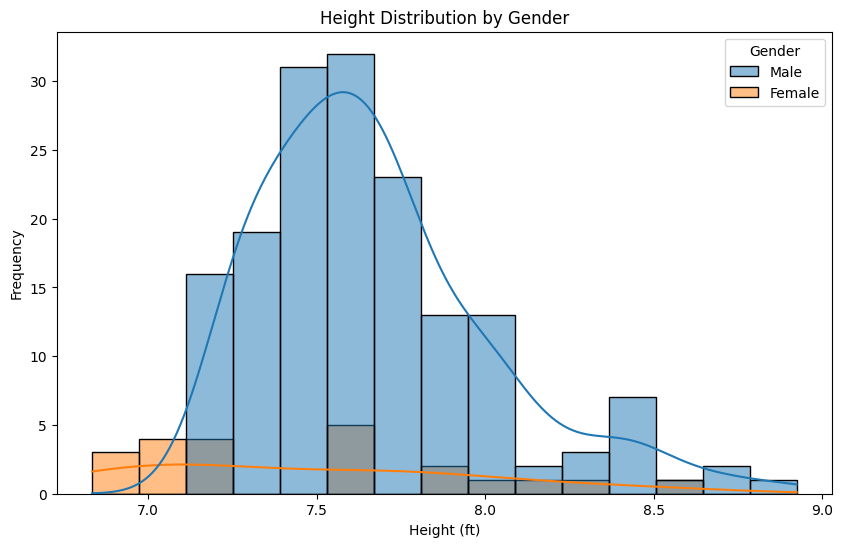

In [86]:
#Height Distribution by Gender
plt.figure(figsize=(10, 6))
sns.histplot(data=tallest_people, x='Imperial', hue='Gender', kde=True)
plt.title('Height Distribution by Gender')
plt.xlabel('Height (ft)')
plt.ylabel('Frequency')
plt.show()

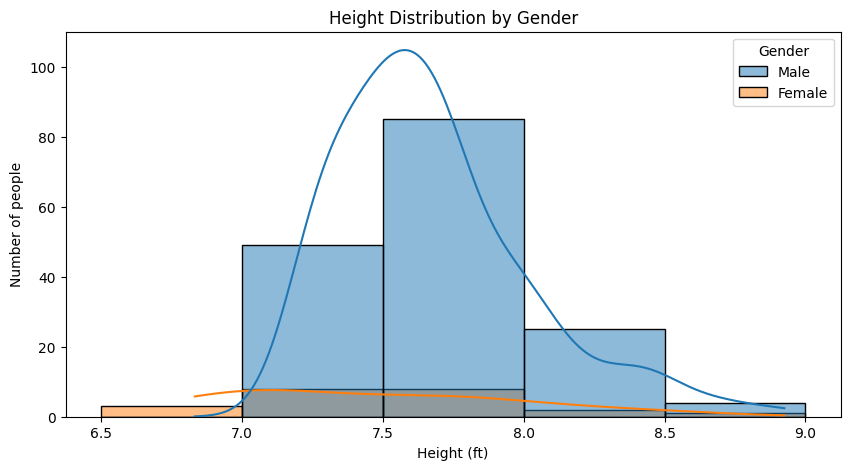

In [87]:
#Height Distribution by Gender

# Define custom bins
custom_bins = [6.5, 7, 7.5, 8, 8.5, 9]

plt.figure(figsize=(10, 5))
sns.histplot(data=tallest_people, x='Imperial', hue='Gender', bins=custom_bins, kde=True)
#sns.histplot(data=tallest_people, x='Imperial', hue='Gender', bins=custom_bins)
plt.title('Height Distribution by Gender')
plt.xlabel('Height (ft)')
plt.ylabel('Number of people')
plt.show()

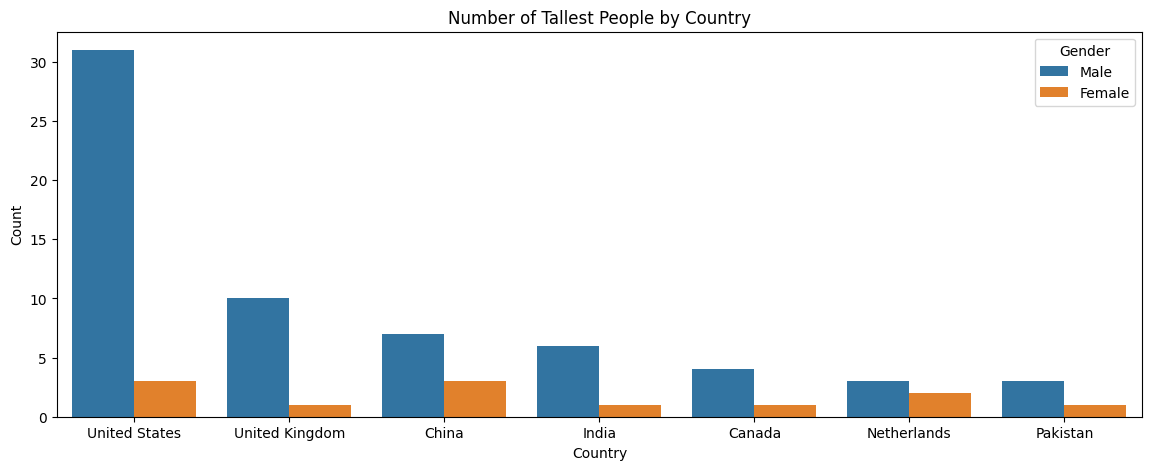

In [102]:
# Get top 10 countries by count
top_10_countries = tallest_people['Country'].value_counts().head(7).index

plt.figure(figsize=(14, 5))
sns.countplot(data=tallest_people, x='Country', hue='Gender', order=top_10_countries.value_counts().index)
plt.title('Number of Tallest People by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels horizontally
plt.show()

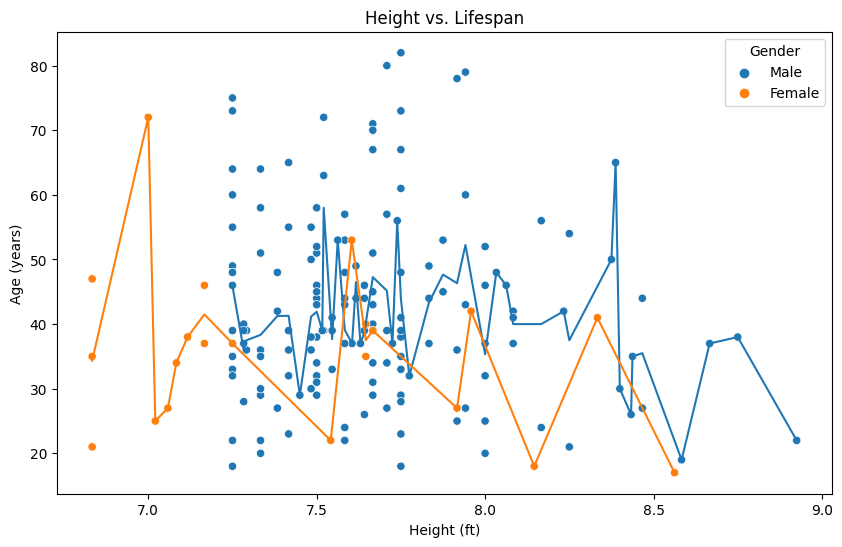

In [89]:
# Drop rows with NaN values in 'length' or 'lifespan' columns
#tallest_people_cleaned = tallest_people.dropna(subset=['Imperial', 'Age'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tallest_people, x='Imperial', y='Age', hue='Gender')
#sns.scatterplot(data=tallest_people_cleaned, x='Imperial', y='Age', hue='Gender')
# Add a trend line
sns.lineplot(data=tallest_people, x='Imperial', y='Age', hue='Gender', errorbar=None, legend=False)
plt.title('Height vs. Lifespan')
plt.xlabel('Height (ft)')
plt.ylabel('Age (years)')
plt.show()

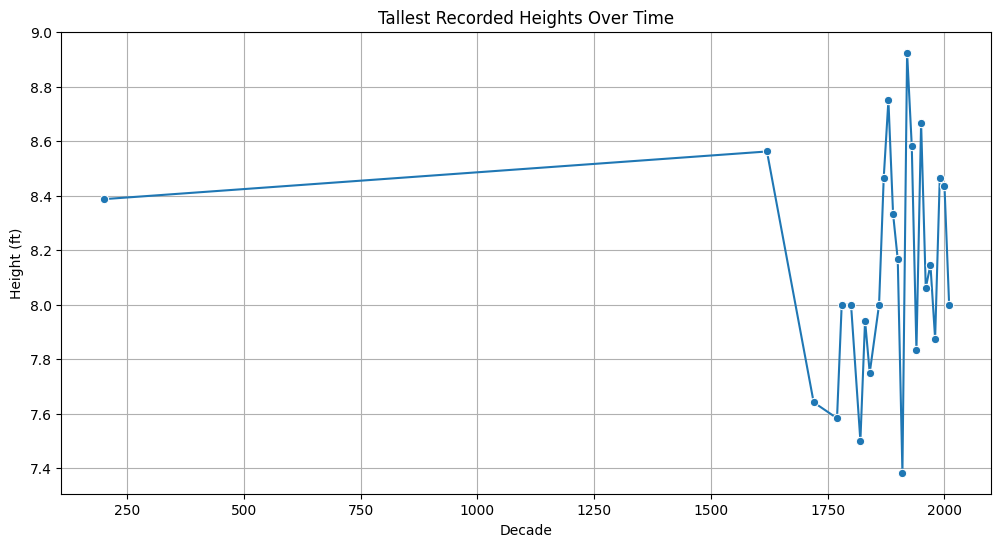

In [90]:
# Estimate the year of recording as midpoint of lifespan
tallest_people['RecordingYear'] = tallest_people['BirthYear'] + (tallest_people['Age'] / 2)

# Group data by decade and get the maximum height for each decade
tallest_people['Decade'] = (tallest_people['RecordingYear'] // 10) * 10
max_heights_per_decade = tallest_people.groupby('Decade')['Imperial'].max().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=max_heights_per_decade, x='Decade', y='Imperial', marker='o')
plt.title('Tallest Recorded Heights Over Time')
plt.xlabel('Decade')
plt.ylabel('Height (ft)')
plt.grid(True)
plt.show()

In [91]:
#drop na values
#tallest_people_wo_na = tallest_people.dropna()

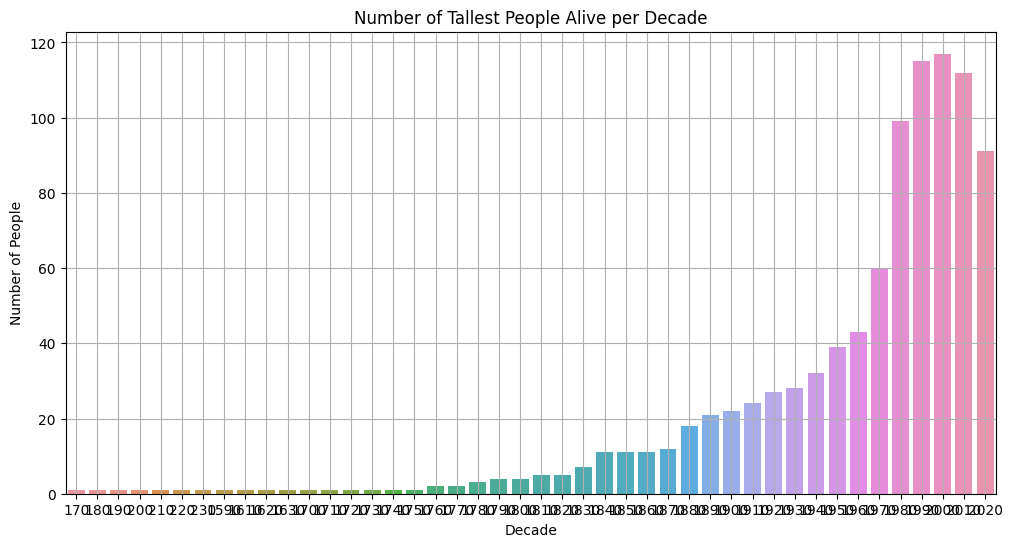

In [92]:
# Create a DataFrame for every year in each individual's lifespan
expanded_data = []

for index, row in tallest_people.iterrows():
    birth_year = int(row['BirthYear'])
    death_year = int(row['DeathYear'])
    for year in range(birth_year, death_year + 1):
        expanded_data.append({'Year': year, 'Name': row['Name']})

expanded_df = pd.DataFrame(expanded_data)

# Group data by decade and count the number of people alive in each decade
expanded_df['Decade'] = (expanded_df['Year'] // 10) * 10
count_per_decade = expanded_df.groupby('Decade')['Name'].nunique().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=count_per_decade, x='Decade', y='Name')
plt.title('Number of Tallest People Alive per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

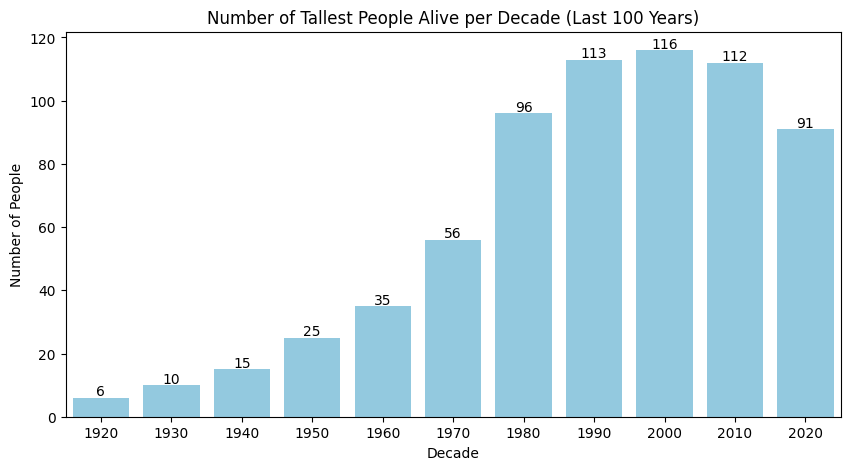

In [103]:
# Filter data for the last 100 years
tallest_people_last_100 = tallest_people[tallest_people['BirthYear'] >= 1924]

# Create a DataFrame for every year in each individual's lifespan
expanded_data = []

for index, row in tallest_people_last_100.iterrows():
    birth_year = int(row['BirthYear'])
    death_year = int(row['DeathYear'])
    for year in range(birth_year, death_year + 1):
        expanded_data.append({'Year': year, 'Name': row['Name']})

expanded_df = pd.DataFrame(expanded_data)

# Group data by decade and count the number of people alive in each decade
expanded_df['Decade'] = (expanded_df['Year'] // 10) * 10
count_per_decade = expanded_df.groupby('Decade')['Name'].nunique().reset_index()

# Create the bar plot with uniform color
plt.figure(figsize=(10, 5))
barplot = sns.barplot(data=count_per_decade, x='Decade', y='Name', color='skyblue')
plt.title('Number of Tallest People Alive per Decade (Last 100 Years)')
plt.xlabel('Decade')
plt.ylabel('Number of People')

# Annotate each bar with the number of people alive
for index, row in count_per_decade.iterrows():
    barplot.text(row.name, row.Name + 0.6, row.Name, color='black', ha="center")

plt.show()


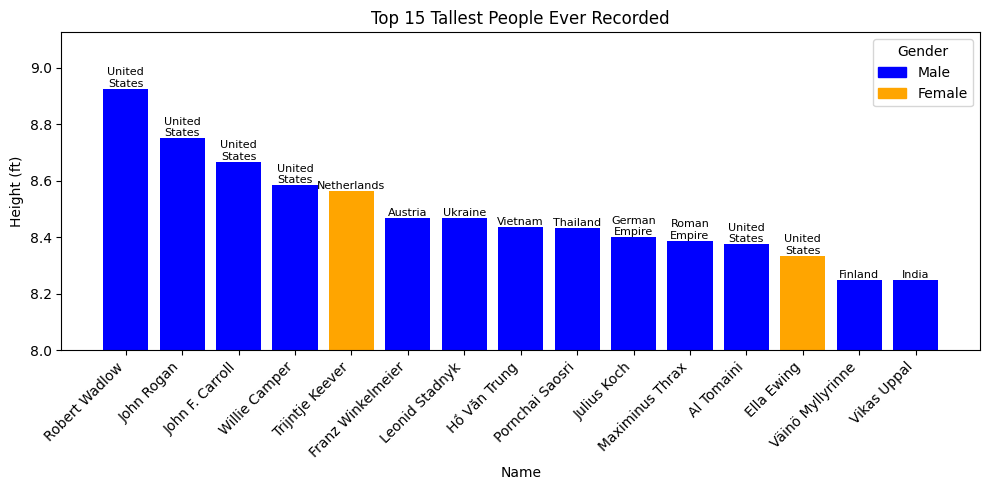

In [115]:
from matplotlib.patches import Patch
# Sort the dataset by height (descending) and select top 15
top_15_tallest = tallest_people.sort_values(by='Imperial', ascending=False).head(15)

# Set color palette based on gender
colors = ['blue' if gender == 'Male' else 'orange' for gender in top_15_tallest['Gender']]

# Create a vertical column chart for the top 15 tallest people with gender-based colors
plt.figure(figsize=(10, 5))
bars = plt.bar(top_15_tallest['Name'], top_15_tallest['Imperial'], color=colors)
plt.title('Top 15 Tallest People Ever Recorded')
plt.xlabel('Name')
plt.ylabel('Height (ft)')
plt.ylim(8, top_15_tallest['Imperial'].max() + 0.2)  # Adjust y-axis to start from min_height - 5
plt.xticks(rotation=45, ha='right')

# Add country name on top of each bar (stacked vertically)
for bar, country in zip(bars, top_15_tallest['Country']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.0, '\n'.join(country.split()), ha='center', va='bottom', fontsize=8)

# Create custom legend
legend_elements = [Patch(facecolor='blue', edgecolor='blue', label='Male'),
                   Patch(facecolor='orange', edgecolor='orange', label='Female')]
plt.legend(handles=legend_elements, title='Gender')

plt.tight_layout()
plt.show()

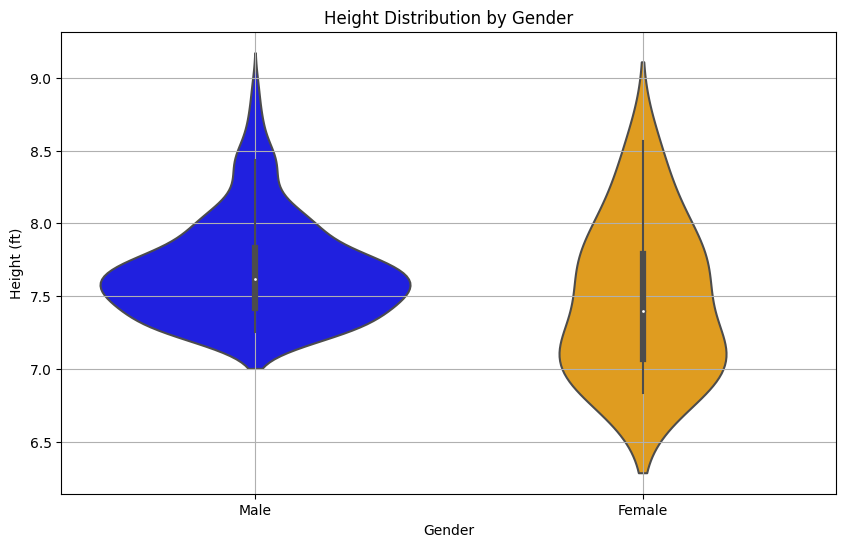

In [95]:
# Create a violin plot to compare the height distribution between men and women
plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Imperial', data=tallest_people, palette=['blue', 'orange'])
plt.title('Height Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Height (ft)')
plt.grid(True)

plt.show()

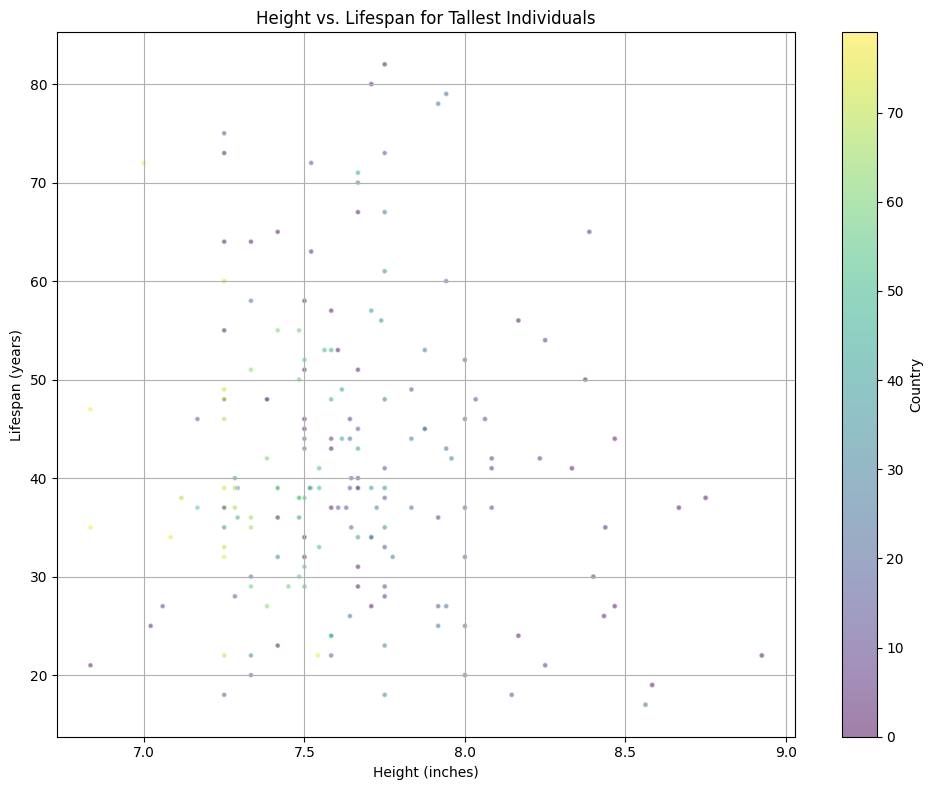

In [96]:
import numpy as np

# Define bubble sizes (optional, based on some attribute)
bubble_sizes = np.sqrt(tallest_people['Imperial']) * 5  # Scale by square root of height for bubble size

# Define bubble colors based on countries
country_codes = {country: idx for idx, country in enumerate(tallest_people['Country'].unique())}
colors = [country_codes[country] for country in tallest_people['Country']]

# Create the bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(tallest_people['Imperial'], tallest_people['Age'], s=bubble_sizes, c=colors, alpha=0.5, cmap='viridis', edgecolors='w', linewidth=1)

# Add colorbar
plt.colorbar(label='Country')
plt.clim(0, len(country_codes) - 1)

# Add labels and title
plt.title('Height vs. Lifespan for Tallest Individuals')
plt.xlabel('Height (inches)')
plt.ylabel('Lifespan (years)')

plt.grid(True)
plt.tight_layout()
plt.show()

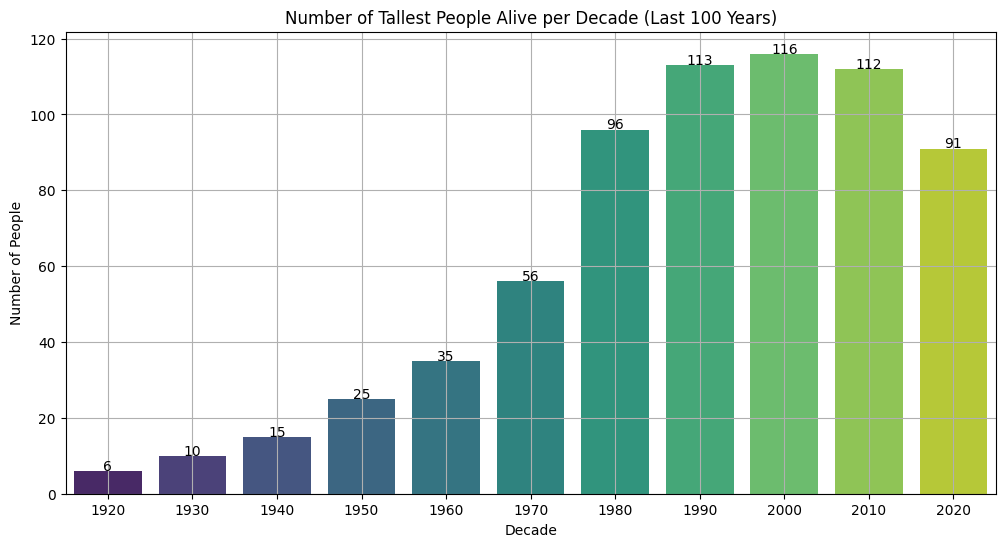

In [97]:
# Replace missing DeathYear with 2024 for people who are still alive
tallest_people['DeathYear'] = tallest_people.apply(lambda x: 2024 if pd.isnull(x['DeathYear']) and x['Lifespan'].startswith('born') else x['DeathYear'], axis=1)

# Filter data for the last 100 years
tallest_people_last_100 = tallest_people[tallest_people['BirthYear'] >= 1924]

# Create a DataFrame for every year in each individual's lifespan
expanded_data = []

for index, row in tallest_people_last_100.iterrows():
    birth_year = int(row['BirthYear'])
    death_year = int(row['DeathYear'])
    for year in range(birth_year, death_year + 1):
        expanded_data.append({'Year': year, 'Name': row['Name']})

expanded_df = pd.DataFrame(expanded_data)

# Group data by decade and count the number of people alive in each decade
expanded_df['Decade'] = (expanded_df['Year'] // 10) * 10
count_per_decade = expanded_df.groupby('Decade')['Name'].nunique().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=count_per_decade, x='Decade', y='Name', palette='viridis')
plt.title('Number of Tallest People Alive per Decade (Last 100 Years)')
plt.xlabel('Decade')
plt.ylabel('Number of People')
plt.grid(True)

# Annotate each bar with the number of people alive
for index, row in count_per_decade.iterrows():
    barplot.text(row.name, row.Name + 0.2, row.Name, color='black', ha="center")

plt.show()

In [98]:
# Filter out people who died before 1980
filtered_df = tallest_people[(tallest_people['DeathYear'].isna()) | (tallest_people['DeathYear'] >= 2020)]

# Further filter out people who were born after 1990
filtered_df = filtered_df[filtered_df['BirthYear'] <= 2030]

# Further filter out people with null/blank age
filtered_df = filtered_df[filtered_df['Age'].notna()]

# Count the remaining people
count_remaining = len(filtered_df)

print(f"Number of people who didn't die before 1980, weren't born after 1990, and have a non-null age: {count_remaining}")

Number of people who didn't die before 1980, weren't born after 1990, and have a non-null age: 91
